### Scrapping Tweets

Documentaion of Twint : https://github.com/twintproject/twint

Here we used Twint api  scarpe data .We consider tweets of Narendra Modi(@narendremodi) from 2019 to 2020.

### Importing libraries for scrapping

In [1]:
import twint 
import nest_asyncio
import pandas as pd
nest_asyncio.apply()# used once to enable concurrent actions within a Jupyter notebook.

import warnings
warnings.simplefilter('ignore')

In [2]:
def scrape_user():
    print ("Fetching Tweets")
    c = twint.Config()
    c.Username = input('Username: \n')
    print('Enter the date since we want to scarp\n')
    c.Since = input('Date (format: "%Y-%m-%d %H:%M:%S"): \n')
    c.Pandas = True
       
    twint.run.Search(c)
    Tweets_df = twint.storage.panda.Tweets_df
    return( Tweets_df)

In [4]:
modi_tweets=scrape_user()

In [5]:
modi_tweets.head(5)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1358330186337570817,1358330186337570817,1.612686e+12,2021-02-07 08:22:07,+0000,,Am constantly monitoring the unfortunate situa...,en,[],[],...,,,,,,[],,,,
1,1358306667591475210,1358306667591475210,1.612681e+12,2021-02-07 06:48:40,+0000,,Addressing a public meeting in Sonitpur distri...,en,[],[],...,,,,,,[],,,,
2,1358251040617938945,1358251040617938945,1.612667e+12,2021-02-07 03:07:37,+0000,,Leaving for Assam and West Bengal. Do watch th...,en,[aatmanirbharpurvibharat],[],...,,,,,,[],,,,
3,1358081824291909633,1358081824291909633,1.612627e+12,2021-02-06 15:55:13,+0000,,Glad to see immense enthusiasm in Assam. Happy...,en,[],[],...,,,,,,[],,,,
4,1358029451133476864,1358029451133476864,1.612614e+12,2021-02-06 12:27:06,+0000,,হলদিয়া পরিশোধনাগারের দ্বিতীয় ক্যাটালিটিক-আইস...,bn,[],[],...,,,,,,[],,,,


* From above data frame we see that tweets include other langauges other than english, we want consider only english.so we drop all other rows

In [6]:
modi_tweets=modi_tweets[modi_tweets['language']=='en']

In [7]:
modi_tweets.head(5)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1358330186337570817,1358330186337570817,1.612686e+12,2021-02-07 08:22:07,+0000,,Am constantly monitoring the unfortunate situa...,en,[],[],...,,,,,,[],,,,
1,1358306667591475210,1358306667591475210,1.612681e+12,2021-02-07 06:48:40,+0000,,Addressing a public meeting in Sonitpur distri...,en,[],[],...,,,,,,[],,,,
2,1358251040617938945,1358251040617938945,1.612667e+12,2021-02-07 03:07:37,+0000,,Leaving for Assam and West Bengal. Do watch th...,en,[aatmanirbharpurvibharat],[],...,,,,,,[],,,,
3,1358081824291909633,1358081824291909633,1.612627e+12,2021-02-06 15:55:13,+0000,,Glad to see immense enthusiasm in Assam. Happy...,en,[],[],...,,,,,,[],,,,
8,1358028817558740992,1358028670783266818,1.612614e+12,2021-02-06 12:24:35,+0000,,The foundation stone of the second Catalytic-I...,en,[],[],...,,,,,,[],,,,


In [8]:
modi_tweets.shape

(2287, 38)

In [9]:
modi_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2287 entries, 0 to 3340
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2287 non-null   object 
 1   conversation_id  2287 non-null   object 
 2   created_at       2287 non-null   float64
 3   date             2287 non-null   object 
 4   timezone         2287 non-null   object 
 5   place            2287 non-null   object 
 6   tweet            2287 non-null   object 
 7   language         2287 non-null   object 
 8   hashtags         2287 non-null   object 
 9   cashtags         2287 non-null   object 
 10  user_id          2287 non-null   int64  
 11  user_id_str      2287 non-null   object 
 12  username         2287 non-null   object 
 13  name             2287 non-null   object 
 14  day              2287 non-null   int64  
 15  hour             2287 non-null   object 
 16  link             2287 non-null   object 
 17  urls          

### Extracting date, time and tweet

In [10]:
data=modi_tweets[['date','tweet']]
data['date'] = pd.to_datetime(data['date'])

In [11]:
data.head()

,date,tweet
0,2021-02-07 08:22:07,Am constantly monitoring the unfortunate situa...
1,2021-02-07 06:48:40,Addressing a public meeting in Sonitpur distri...
2,2021-02-07 03:07:37,Leaving for Assam and West Bengal. Do watch th...
3,2021-02-06 15:55:13,Glad to see immense enthusiasm in Assam. Happy...
8,2021-02-06 12:24:35,The foundation stone of the second Catalytic-I...


### Import Libraries for NLP

In [12]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import spacy

In [13]:
def get_hashtags(text):
    """ Extract hashtags from tweet """
    hashtags = re.findall(r'\#\w+',text.lower())
    return hashtags
def get_mentions(text):
    """ Extract mentions from tweet """
    mentions = re.findall(r'\@\w+',text.lower())
    return mentions

### Feature Engineering

In [14]:
# feature engineering on date column
data['month']=data['date'].dt.month
data['year']=data['date'].dt.year
data['hour']=data['date'].apply(lambda x: x.hour)

# feature engineering on tweet column
data['length']=data['tweet'].apply(lambda x: len(x.split()))
data['hashtags']=data['tweet'].apply(lambda x: get_hashtags(x))
data['mentions']=data['tweet'].apply(lambda x: get_mentions(x))
data['num_hashtags']=data['tweet'].apply(lambda x: len(get_hashtags(x)))# number of hashtags
data['num_mentions']=data['tweet'].apply(lambda x: len(get_mentions(x)))# number of mentions

In [15]:
data.tail()

,date,tweet,month,year,hour,length,hashtags,mentions,num_hashtags,num_mentions
3336,2020-01-01 12:39:27,Birthday wishes to the hardworking CM of Manip...,1,2020,12,32,[],[@nbirensingh],0,1
3337,2020-01-01 06:04:52,Creation of the Department of Military Affairs...,1,2020,6,36,[],[],0,0
3338,2020-01-01 06:04:13,"On 15th August 2019, from the ramparts of the ...",1,2020,6,44,[],[],0,0
3339,2020-01-01 06:03:31,"As the first CDS takes charge, I pay homage to...",1,2020,6,46,[],[],0,0
3340,2020-01-01 06:02:53,I am delighted that as we begin the new year a...,1,2020,6,49,[],[],0,0


### Cleaning the Tweet

In [16]:
from spacy.lang.en.stop_words import STOP_WORDS
stemmer = PorterStemmer()#stemming
stop_words = spacy.lang.en.stop_words.STOP_WORDS#loading the stop words from spacy

In [17]:
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls(links)
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text
def process_text(text, stem=False):
    text=remove_content(text)
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    tokenized_text = word_tokenize(text) #tokenize the tweet
    clean_text = [
         word for word in tokenized_text
         if (word not in stop_words and len(word)>1)
    ]
    if stem:
        clean_text=[stemmer.stem(word) for word in clean_text] # stemming
    return ' '.join(clean_text)

In [18]:
data['cleaned_tweets']=data['tweet'].apply(lambda x: process_text(x))
data['tweet']=data['tweet'].apply(lambda x: remove_content(x))

In [19]:
data.head(3)

,date,tweet,month,year,hour,length,hashtags,mentions,num_hashtags,num_mentions,cleaned_tweets
0,2021-02-07 08:22:07,Am constantly monitoring the unfortunate situa...,2,2021,8,38,[],[],0,0,constantly monitoring unfortunate situation ut...
1,2021-02-07 06:48:40,Addressing a public meeting in Sonitpur distri...,2,2021,6,9,[],[],0,0,addressing public meeting sonitpur district assam
2,2021-02-07 03:07:37,Leaving for Assam and West Bengal. Do watch th...,2,2021,3,13,[#aatmanirbharpurvibharat],[],1,0,leaving assam west bengal watch programmes live


### Text Analysis

In [20]:
tweet_list = data['cleaned_tweets'].tolist()
all_words=' '.join(tweet_list).split()# converting each tweet into word

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from sklearn.feature_extraction.text import CountVectorizer 
import plotly.express as px
def plot_topn(sentences, ngram_range=(1,3), top=20,firstword=''):
    c=CountVectorizer(ngram_range=ngram_range)# count vectorizer
    X=c.fit_transform(sentences)# fit and transform
    words=pd.DataFrame(X.sum(axis=0),columns=c.get_feature_names()).T.sort_values(0,ascending=False).reset_index()
    res=words[words['index'].apply(lambda x: firstword in x)].head(top)# craeting dataframe from top 20 words based on count vectorizer
    plt.figure(figsize=(20, 8))
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    ax = sns.barplot(x='index',y=0,data=res,color='blue')
    labels = ax.get_xticklabels() 
    ax.set_ylabel('Count')
    ax.set_xlabel('Phrases')
    ax.set_xticklabels(labels, rotation=70,size = 15)
    plt.show()

##### Frequent unigrams

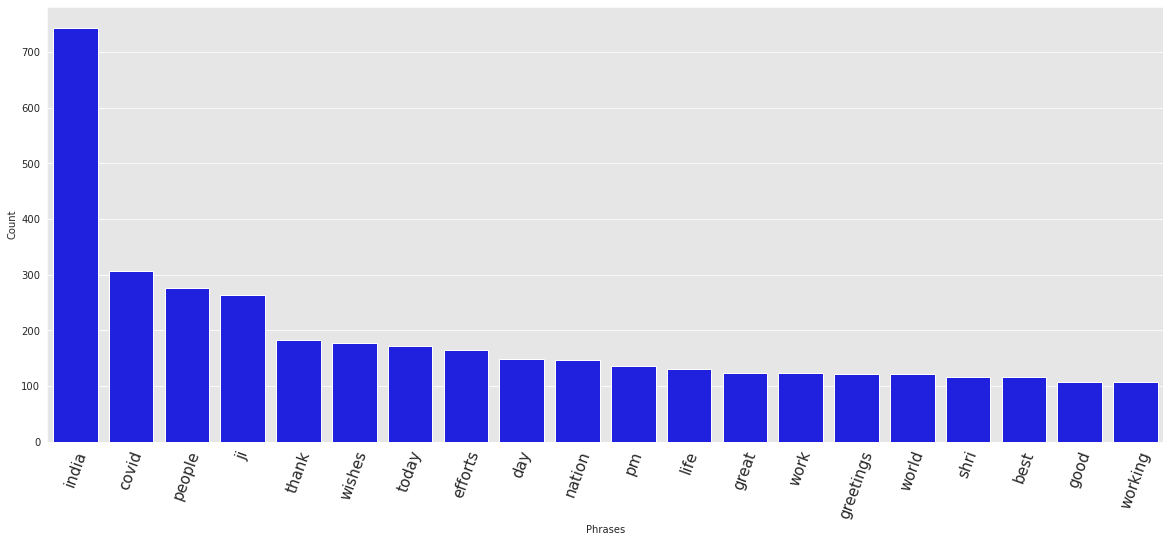

In [23]:
plot_topn(tweet_list, ngram_range=(1,1))

### Frequent bigrams

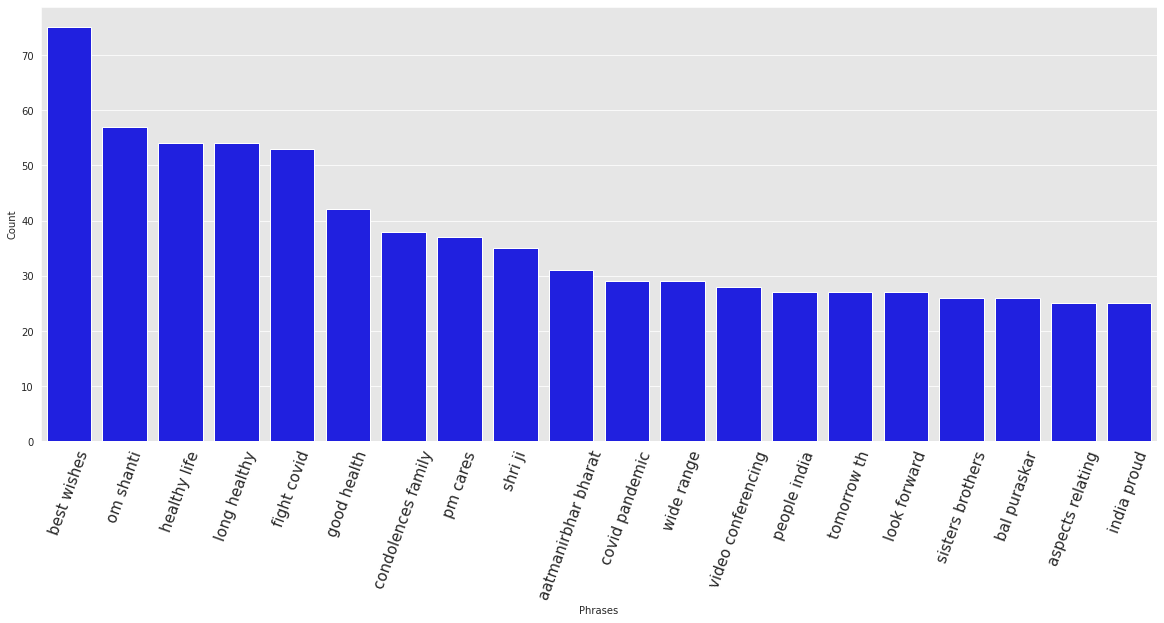

In [24]:
plot_topn(tweet_list, ngram_range=(2,2))

#### Frequent trigrams

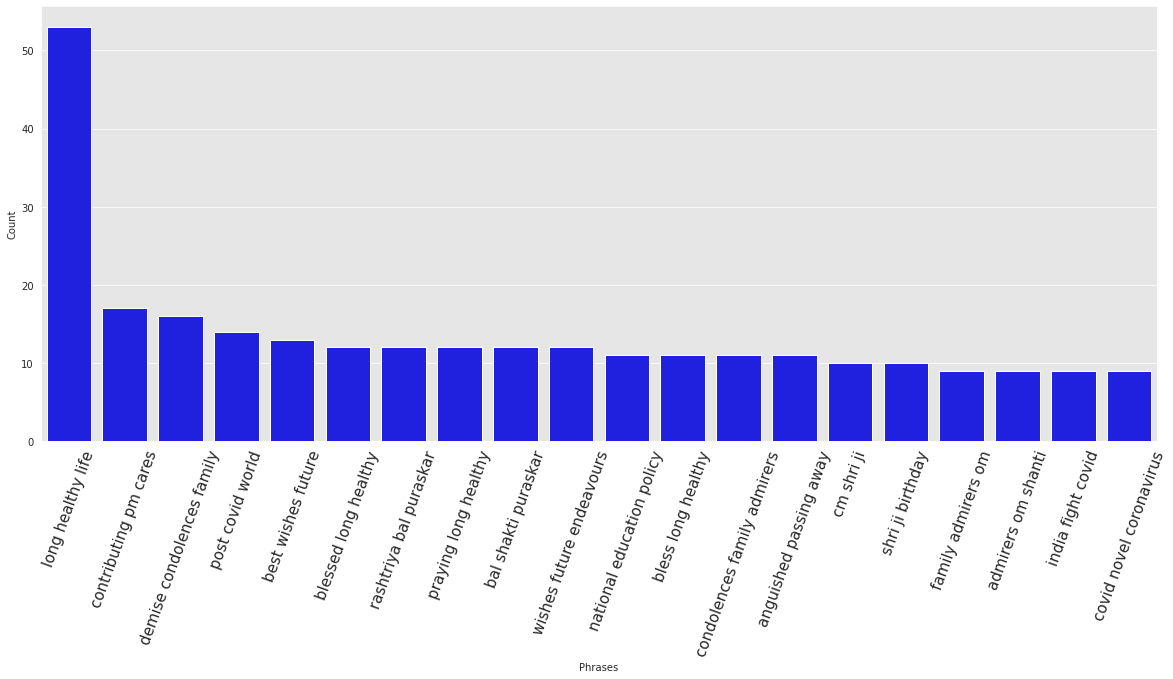

In [25]:
plot_topn(tweet_list, ngram_range=(3,3))

#### Frequent bigrams and trigrams 

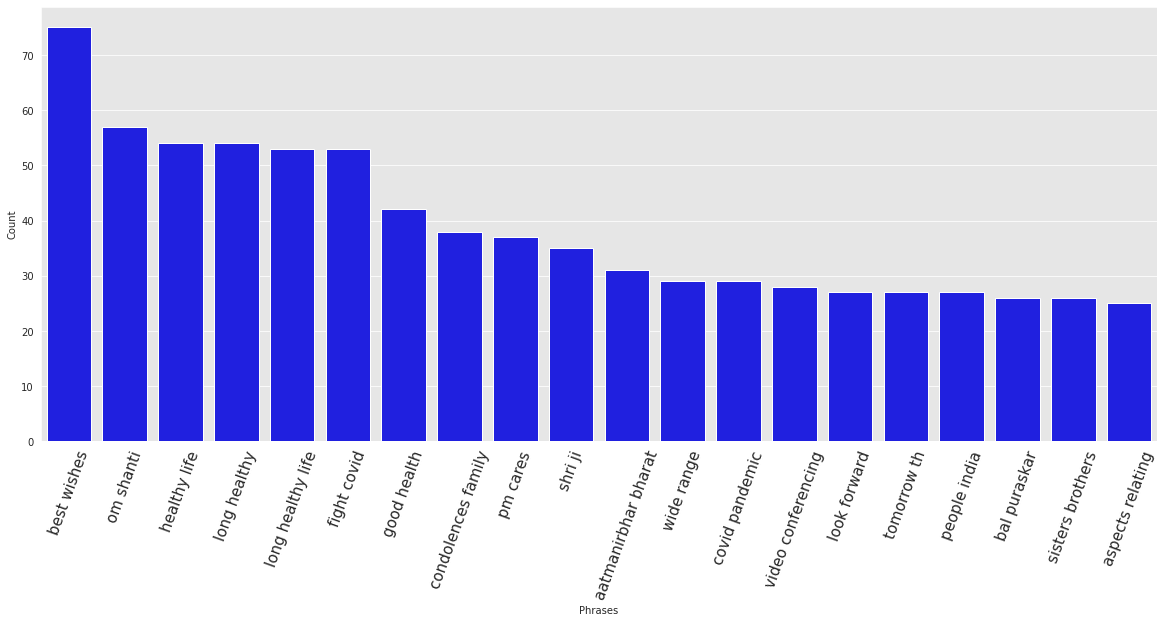

In [26]:
plot_topn(tweet_list, ngram_range=(2,3))

### Tweets starts word 'covid'

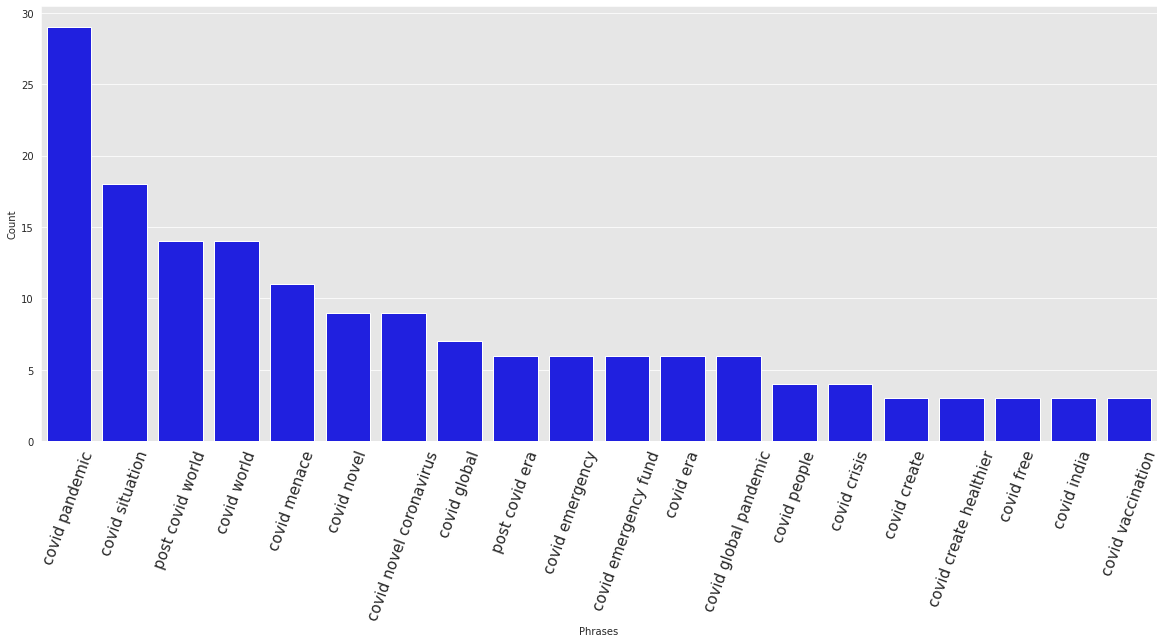

In [27]:
plot_topn(tweet_list, ngram_range=(1,3),firstword='covid ')

###  Hashtags

In [28]:
hashes=data['hashtags'].tolist()
tags=[]
for x in hashes:
    if x:
        tags.extend(x)
print(len(tags))        

581


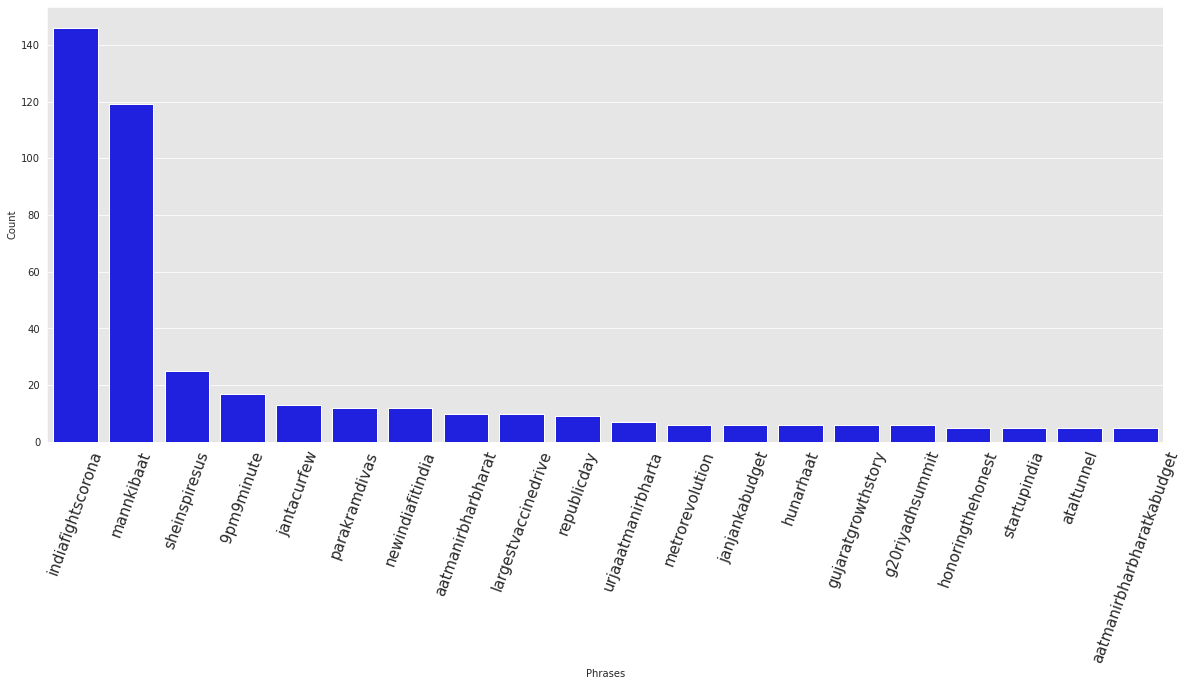

In [29]:
plot_topn(tags)

### Mentions

In [30]:
mentions=data['mentions'].tolist()
ment=[]
for x in mentions:
    if x:
        ment.extend(x)
len(ment)

657

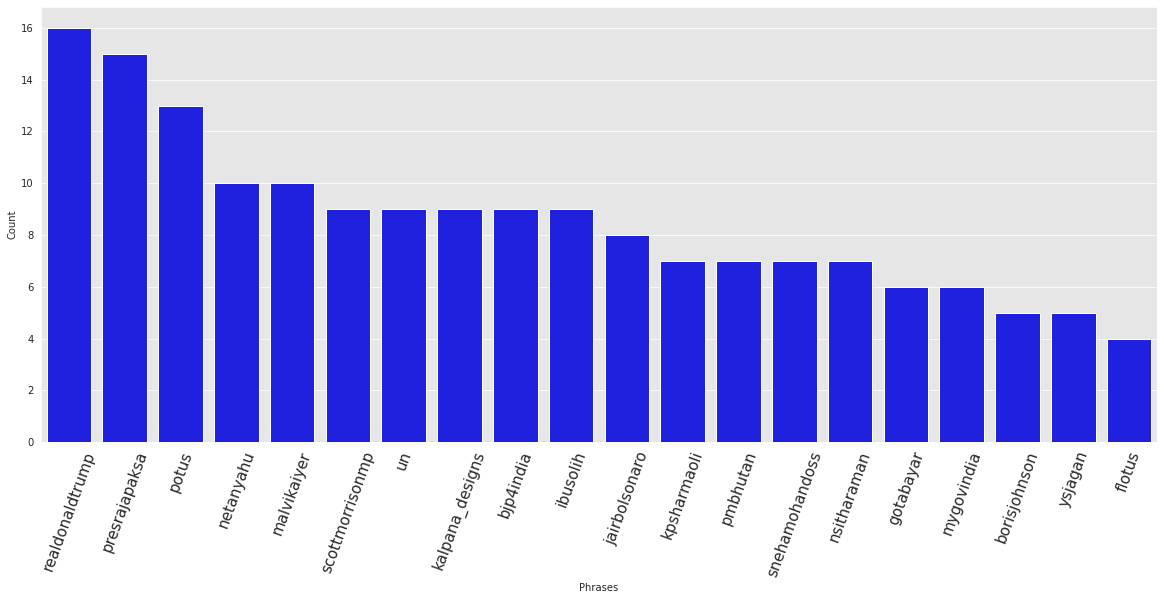

In [31]:
plot_topn(ment)

### Sentiment Analysis

In [32]:
from textblob import TextBlob
data['sentiment']=data['tweet'].apply(lambda x:TextBlob(x).sentiment[0])
data['subject']=data['tweet'].apply(lambda x: TextBlob(x).sentiment[1])
data['polarity']=data['sentiment'].apply(lambda x: 'pos' if x>=0 else 'neg')#adding polarity positive or negativeS

In [33]:
data.head()

,date,tweet,month,year,hour,length,hashtags,mentions,num_hashtags,num_mentions,cleaned_tweets,sentiment,subject,polarity
0,2021-02-07 08:22:07,Am constantly monitoring the unfortunate situa...,2,2021,8,38,[],[],0,0,constantly monitoring unfortunate situation ut...,-0.250000,0.666667,neg
1,2021-02-07 06:48:40,Addressing a public meeting in Sonitpur distri...,2,2021,6,9,[],[],0,0,addressing public meeting sonitpur district assam,0.000000,0.066667,pos
2,2021-02-07 03:07:37,Leaving for Assam and West Bengal. Do watch th...,2,2021,3,13,[#aatmanirbharpurvibharat],[],1,0,leaving assam west bengal watch programmes live,0.136364,0.500000,pos
3,2021-02-06 15:55:13,Glad to see immense enthusiasm in Assam. Happy...,2,2021,15,29,[],[],0,0,glad immense enthusiasm assam happy getting op...,0.433333,1.000000,pos
8,2021-02-06 12:24:35,The foundation stone of the second Catalytic-I...,2,2021,12,28,[],[],0,0,foundation stone second catalytic isodewaxing ...,0.000000,0.000000,pos


Text(0.5, 0, 'Hour')

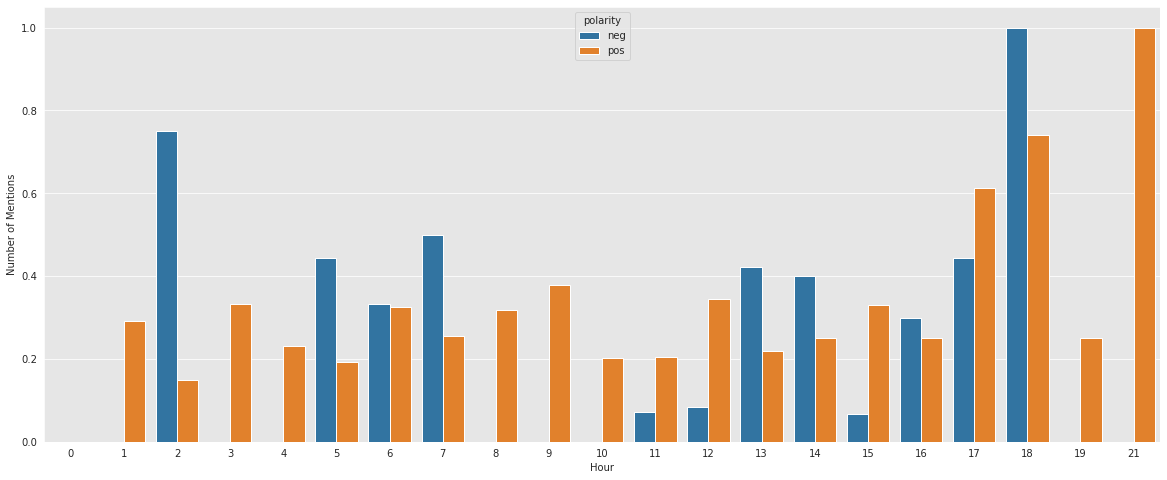

In [34]:
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.barplot(x='hour',y="num_mentions",data=data,hue="polarity",ci=None)
ax.set_ylabel('Number of Mentions')
ax.set_xlabel('Hour')

Text(0.5, 0, 'Hour')

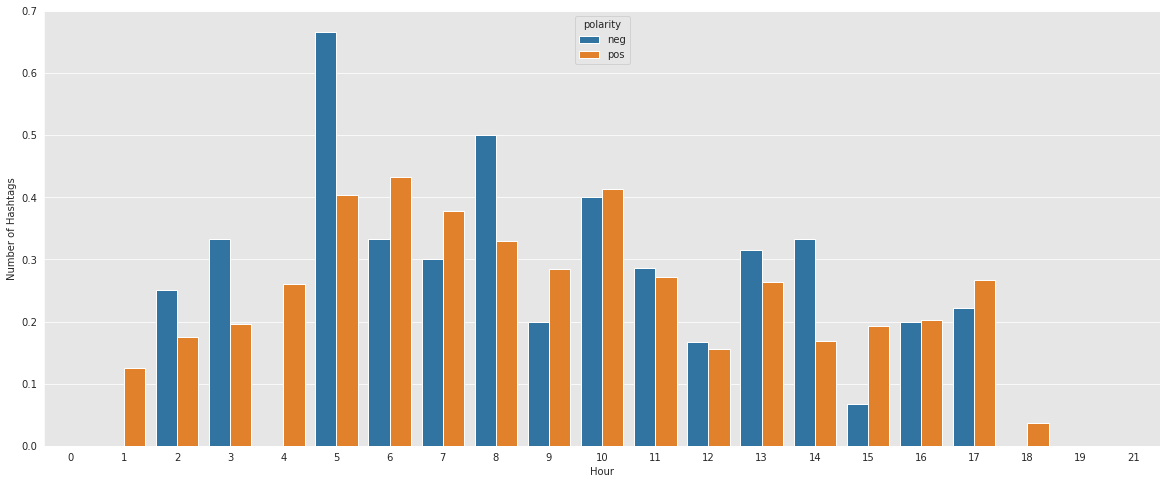

In [35]:
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.barplot(x='hour',y="num_hashtags",data=data,hue="polarity",ci=None)
ax.set_ylabel('Number of Hashtags')
ax.set_xlabel('Hour')

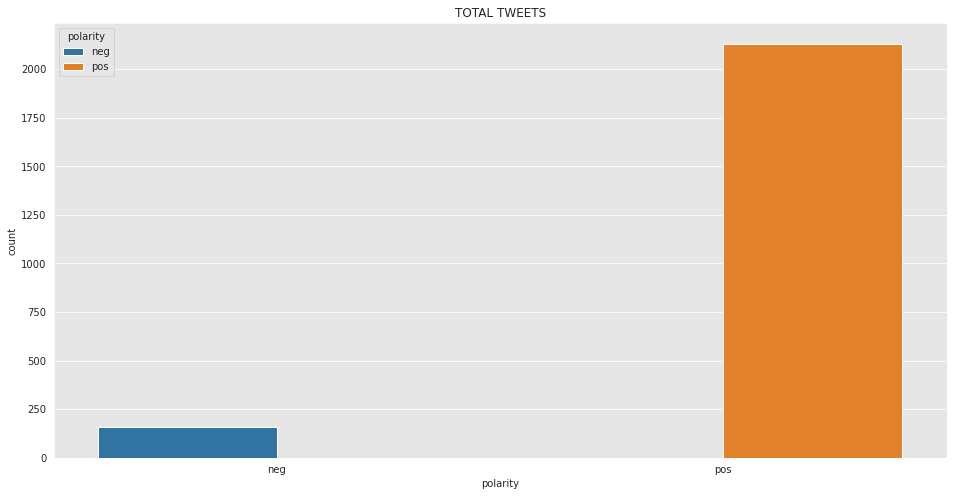

In [36]:
plt.figure(figsize=(16, 8))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.countplot(x='polarity',data=data,hue="polarity").set_title('TOTAL TWEETS')


Text(0.5, 1.0, 'SUBJECTIVE TWEETS')

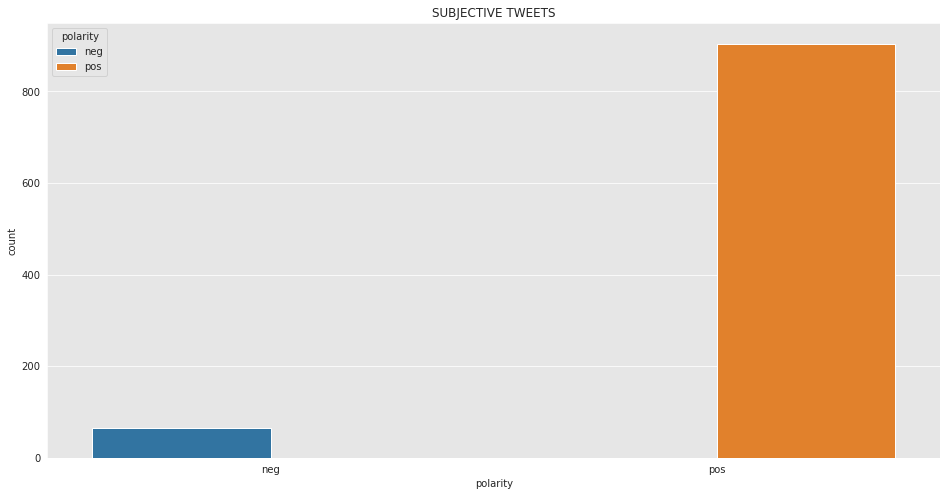

In [37]:
plt.figure(figsize=(16, 8))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.countplot(data=data[data['subject']>0.5],x="polarity",hue='polarity').set_title('SUBJECTIVE TWEETS')


### Word cloud

In [37]:
from wordcloud import WordCloud, STOPWORDS
temp=' '.join(data['cleaned_tweets'].tolist())
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white',
                min_font_size = 10).generate(temp)

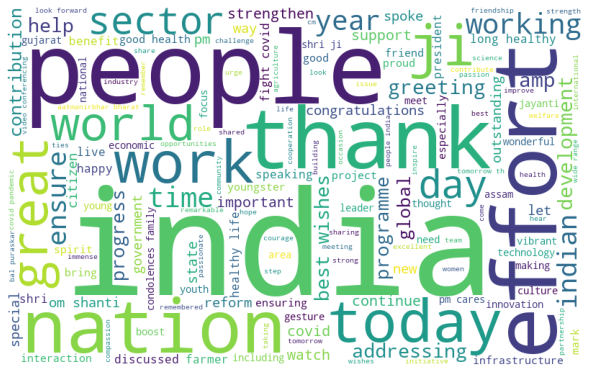

In [38]:

import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 
  
plt.show()